**ogs@jupyter-lab: C process: Thermal Tracer Diffusion**

<table><tr>
<td> <img src="ogs-workflows.png" alt="Drawing" style="width: 300px;"/> </td>
<td> <img src="icross-logo-ok.png" alt="Drawing" style="width: 100px;"/> </td>
</tr></table>

**Thermal Tracer Diffusion: Step 1: HT process: Simulated steady-state T field**

In [1]:
from ogs6py import ogs
PATH_OGS="/home/ok/ogs/build/release/bin/"
print("===============")
print(">>> run ogs <<<")
model = ogs.OGS(PROJECT_FILE="TemperatureField1D.prj")
model.run_model(path=PATH_OGS,LOGFILE="console.log")

>>> run ogs <<<
OGS finished with project file TemperatureField1D.prj.
Execution took 0.3452732563018799 s


>>> print results <<<
TemperatureField1D.pvd


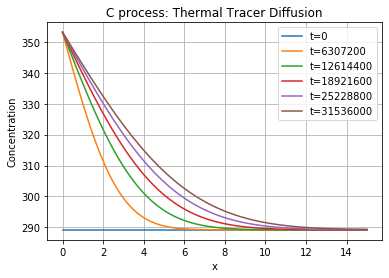

In [2]:
import vtuIO
import numpy as np
import matplotlib.pyplot as plt
print("=====================")
print(">>> print results <<<")
pvdfile=vtuIO.PVDIO("TemperatureField1D.pvd", dim=1)
xaxis =  [(i,0,0) for i in np.linspace(start=0.0, stop=15, num=100)]
r_x = np.array(xaxis)[:,0]
time = [0,6307200,12614400,18921600,25228800,31536000]
for t in time:
    function_xaxis_t = pvdfile.read_point_set_data(t, 'T', pointsetarray=xaxis)
    plt.plot(r_x, function_xaxis_t, label='t='+str(t))
titlestring="C process: Thermal Tracer Diffusion"
plt.title(titlestring)
#plt.xscale('log')
plt.xlabel('x')
plt.ylabel('Concentration')
plt.legend()
plt.grid()
#plt.savefig("profile.png")
plt.show()

**Thermal Tracer Diffusion: Step 2: Calculate T-dependent diffusion tensor**

In [3]:
%run processTarray.py

------------------------------------------------
INFO: Output mesh written to: TemperatureField_transport.vtu
------------------------------------------------


**Thermal Tracer Diffusion: Step 3: HC model with T-dependent properties**

In [4]:
print("===============")
print(">>> run ogs <<<")
model = ogs.OGS(PROJECT_FILE="TemperatureField_transport.prj")
model.run_model(path=PATH_OGS,LOGFILE="console2.log")

>>> run ogs <<<
OGS finished with project file TemperatureField_transport.prj.
Execution took 0.7851507663726807 s


>>> print results <<<
TemperatureField_transport.pvd


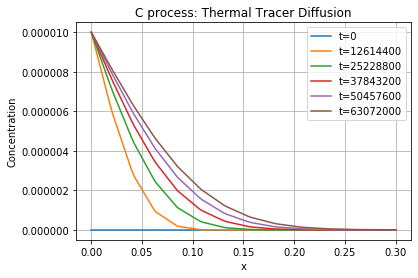

In [5]:
print("=====================")
print(">>> print results <<<")
pvdfile=vtuIO.PVDIO("TemperatureField_transport.pvd", dim=1)
xaxis =  [(i,0,0) for i in np.linspace(start=0.0, stop=0.3, num=100)]
r_x = np.array(xaxis)[:,0]
time = [0,12614400,25228800,37843200,50457600,63072000]
for t in time:
    function_xaxis_t = pvdfile.read_point_set_data(t, 'Cs', pointsetarray=xaxis)
    plt.plot(r_x, function_xaxis_t, label='t='+str(t))
titlestring="C process: Thermal Tracer Diffusion"
plt.title(titlestring)
#plt.xscale('log')
plt.xlabel('x')
plt.ylabel('Concentration')
plt.legend()
plt.grid()
#plt.savefig("profile.png")
plt.show()

In [6]:
import time
print(time.ctime())

Fri Jul 23 00:35:27 2021


**OGS links**
- description: https://www.opengeosys.org/docs/benchmarks/
- project file: https://gitlab.opengeosys.org/garibay-j/ogs/-/tree/TracerThermalDiffusion
- notebook draft by OK: https://github.com/OlafKolditz/ogs-jupyter-lab

**Credits**
- Jaime Garibay Rodriguez and Renchao Lu for this benchmark set up
- Jörg Buchwald for ogs6py and VTUInterface (https://joss.theoj.org/papers/6ddcac13634c6373e6e808952fdf4abc)
- Frameworks acknowledgements: OGS, Python, Jupyter, matplotlib